## Importing Basic Modules for Analysis

In [ ]:
import os
import numpy as  np
import pandas as pd
from joblib import load

In [2]:
import joblib
joblib.__version__

'1.2.0'

In [3]:
pd.__version__

'1.3.5'

In [ ]:
# This command is used to run R in docker and make all computations
#docker run --rm --mount type=bind,src="C:\Users\ASUS\Desktop\shared\wfallcorr_kunashir\kripley",target=/home/jupyteruser -p 8888:8888 rpy2/jupyter:latest

In [6]:
data=load("bugs_veg_200k.dat")

In [7]:
data.head()

,wfall_mask,wfall_area,lats,lons,bugs_mask,bugs_area,aspect,curvature,elevation,morphology,slope,tree_cover,vegetation
0,False,0.0,4.869491e+06,389274.551581,False,0.000000,15.751173,1.9440,91.0,4.0,18.188120,90.0,7.0
1,False,0.0,4.870436e+06,392102.110644,False,0.000000,119.054604,0.3888,130.0,7.0,2.390084,85.0,7.0
2,False,0.0,4.870536e+06,394316.944179,True,28.142484,343.610474,0.2592,179.0,5.0,8.176078,90.0,6.0
3,False,0.0,4.868801e+06,390510.587170,False,0.000000,129.173660,-0.2592,126.0,8.0,15.769171,90.0,7.0
4,False,0.0,4.873620e+06,397572.368528,False,0.000000,203.198593,-1.0368,139.0,9.0,3.533500,90.0,2.0


In [30]:
data=pd.read_csv('new_bugs.csv') 

In [31]:
data['bugs_mask'] = data.bugs_area > 3 # (filter small artifacts)


In [32]:
data.bugs_mask.sum()

7609

In [33]:
data.wfall_mask.sum()

8846

In [34]:
data.head()

,Unnamed: 0,wfall_mask,bugs_area,wfall_area,lats,lons,aspect,curvature,elevation,morphology,slope,tree_cover,vegetation,bugs_mask
0,0,False,0.000000,0.0,4.869491e+06,389274.551581,15.751173,1.9440,91.0,4.0,18.188120,90.0,7.0,False
1,1,False,0.000000,0.0,4.870436e+06,392102.110644,119.054604,0.3888,130.0,7.0,2.390084,85.0,7.0,False
2,2,False,28.142484,0.0,4.870536e+06,394316.944179,343.610474,0.2592,179.0,5.0,8.176078,90.0,6.0,True
3,3,False,0.000000,0.0,4.868801e+06,390510.587170,129.173660,-0.2592,126.0,8.0,15.769171,90.0,7.0,False
4,4,False,0.000000,0.0,4.873620e+06,397572.368528,203.198593,-1.0368,139.0,9.0,3.533500,90.0,2.0,False


In [35]:
os.environ["R_LIBS_USER"] ="/home/jupyteruser/libs"
os.environ["PATH"] = os.environ["PATH"] + ":/home/jupyteruser/.local/lib/python3.7site-packages"

Use Rpy2 bridge to connect to R from Python

In [36]:
import rpy2

In [37]:
from rpy2.robjects.packages import importr
from rpy2.robjects.packages import isinstalled

In [40]:
isinstalled("spatstat.geom")

True

In [41]:
sp=importr("spatstat.model")

In [42]:
from rpy2.robjects import robject as ro

In [43]:
sps = importr('spatstat')

In [44]:
sp_geom = importr('spatstat.geom')

In [45]:
sp_data = importr('spatstat.data')

In [46]:
from rpy2.robjects.vectors import FloatVector, FactorVector, StrVector

In [47]:
sv = StrVector('abab')

In [48]:
pts = data[(data.bugs_mask | data.wfall_mask) & ~(data.bugs_mask * data.wfall_mask)]

In [49]:
pts

,Unnamed: 0,wfall_mask,bugs_area,wfall_area,lats,lons,aspect,curvature,elevation,morphology,slope,tree_cover,vegetation,bugs_mask
2,2,False,28.142484,0.000000,4.870536e+06,394316.944179,343.610474,0.2592,179.0,5.0,8.176078,90.0,6.0,True
49,49,True,0.000000,104728.953615,4.867362e+06,392057.218916,84.173660,-0.6480,103.0,8.0,11.292312,85.0,2.0,False
57,57,True,0.000000,12512.048698,4.866879e+06,390532.193515,198.434952,0.1296,38.0,3.0,2.202518,85.0,7.0,False
63,63,False,76.730757,0.000000,4.875025e+06,396392.645221,104.620872,-0.1296,102.0,5.0,10.908722,86.0,6.0,True
67,67,False,0.000000,0.000000,4.863807e+06,394952.384399,246.037506,0.6480,92.0,6.0,4.565701,82.0,7.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199910,199910,False,403.537539,0.000000,4.872666e+06,396674.956600,344.357758,0.1296,211.0,6.0,6.008224,84.0,6.0,True
199917,199917,True,0.000000,453.689831,4.864553e+06,394753.442354,196.189209,0.6480,112.0,3.0,7.455642,86.0,7.0,False
199950,199950,True,0.000000,569.977484,4.867821e+06,395783.150382,241.927521,0.1296,208.0,5.0,7.848073,97.0,6.0,False
199967,199967,True,0.000000,1349.946770,4.865495e+06,392813.161695,131.185928,0.1296,94.0,5.0,4.926170,85.0,7.0,False


In [50]:
pts.head()

,Unnamed: 0,wfall_mask,bugs_area,wfall_area,lats,lons,aspect,curvature,elevation,morphology,slope,tree_cover,vegetation,bugs_mask
2,2,False,28.142484,0.000000,4.870536e+06,394316.944179,343.610474,0.2592,179.0,5.0,8.176078,90.0,6.0,True
49,49,True,0.000000,104728.953615,4.867362e+06,392057.218916,84.173660,-0.6480,103.0,8.0,11.292312,85.0,2.0,False
57,57,True,0.000000,12512.048698,4.866879e+06,390532.193515,198.434952,0.1296,38.0,3.0,2.202518,85.0,7.0,False
63,63,False,76.730757,0.000000,4.875025e+06,396392.645221,104.620872,-0.1296,102.0,5.0,10.908722,86.0,6.0,True
67,67,False,0.000000,0.000000,4.863807e+06,394952.384399,246.037506,0.6480,92.0,6.0,4.565701,82.0,7.0,True


In [51]:
x = FloatVector(pts.lats.values)
y = FloatVector(pts.lons.values)
mark_pts = ['w' if item.wfall_mask is True else 'b' for _, item in pts.iterrows()]


In [52]:
only_bugs_lats = FloatVector(pts.lats.values[pts.bugs_mask])
only_bugs_lons = FloatVector(pts.lons.values[pts.bugs_mask])

In [53]:
marks = FactorVector(mark_pts)
pp2 = sp_geom.ppp(x, y, window=sp_geom.ripras(only_bugs_lats, only_bugs_lons), marks=marks)

In [54]:
pp2

window,[RTYPES.VECSXP]
n,[RTYPES.INTSXP]
x,[RTYPES.REALSXP]
y,[RTYPES.REALSXP]
markformat,[RTYPES.STRSXP]
marks,[RTYPES.INTSXP]


In [55]:
sp_ex = importr('spatstat.explore')

Compute all pair combinations K-Ripley: (bugs, bugs), (bugs, wind-fall), (wind-fall, bugs), (wind-fall,wind-fall)

In [56]:
res=sp_ex.alltypes(pp2, fun="Kcross", envelope=True)

In [57]:
len(res.rx2['fns'])

4

In [58]:
res_dfs = []
for i in range(0, 4):
    df = res.rx2['fns'][i]
    
    res_dfs.append(pd.DataFrame({'theo':np.array(df.rx2['theo']),'obs':np.array(df.rx2['obs']), 'r':np.array(df.rx2['r']), 'lo':np.array(df.rx2['lo']), 'hi':np.array(df.rx2['hi']) }))
    res_dfs[-1].to_csv(f'output{i}.csv')

In [59]:
from matplotlib import pyplot as plt


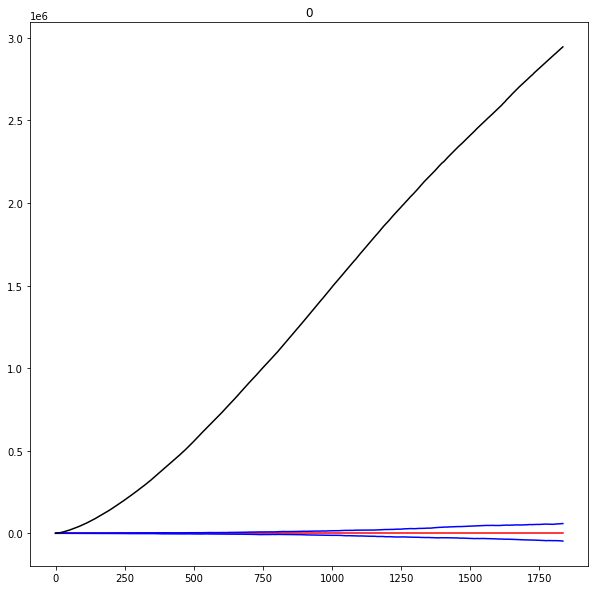

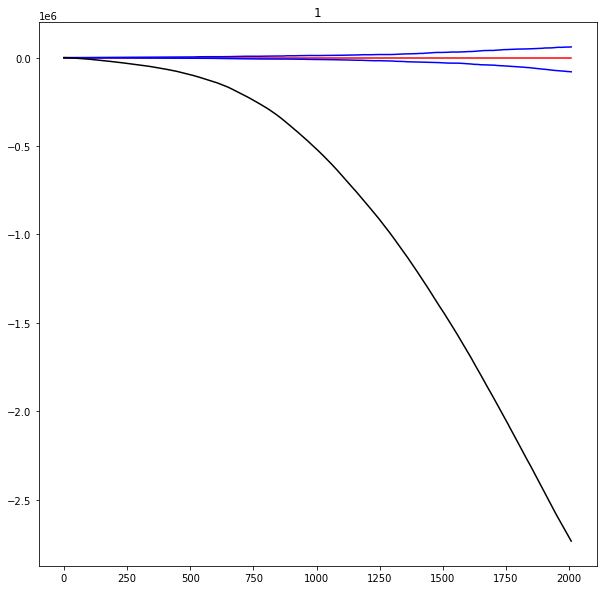

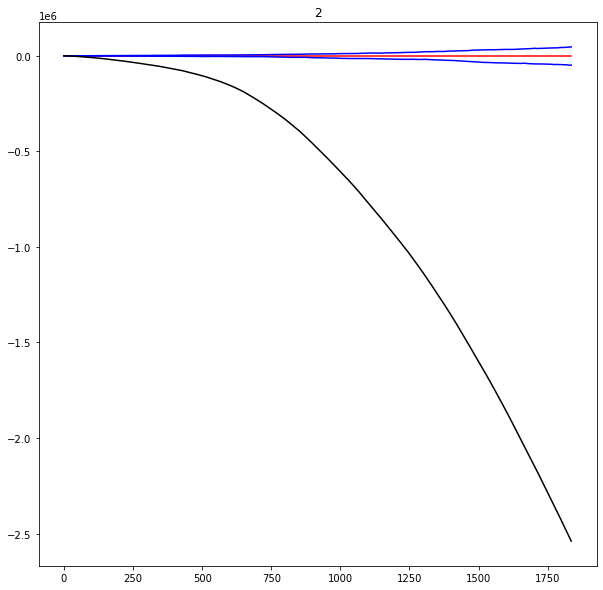

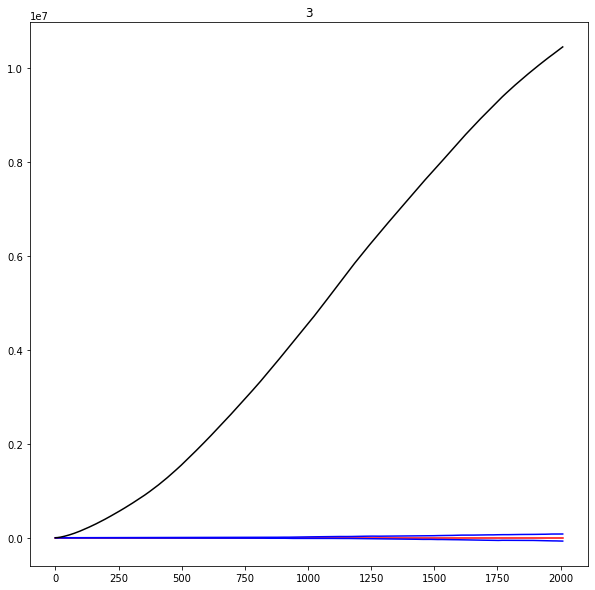

In [60]:
for ind, df in enumerate(res_dfs):
    plt.figure(figsize=(10, 10))
    plt.plot(df.r, df.theo-df.theo, 'r', df.r, df.lo-df.theo, 'b-', df.r, df.hi-df.theo, 'b-', df.r,df.obs-df.theo, 'k')
    plt.title(ind)
    plt.gcf().savefig(f"K_L{ind}.png", dpi=300)
    

/home/jupyteruser/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


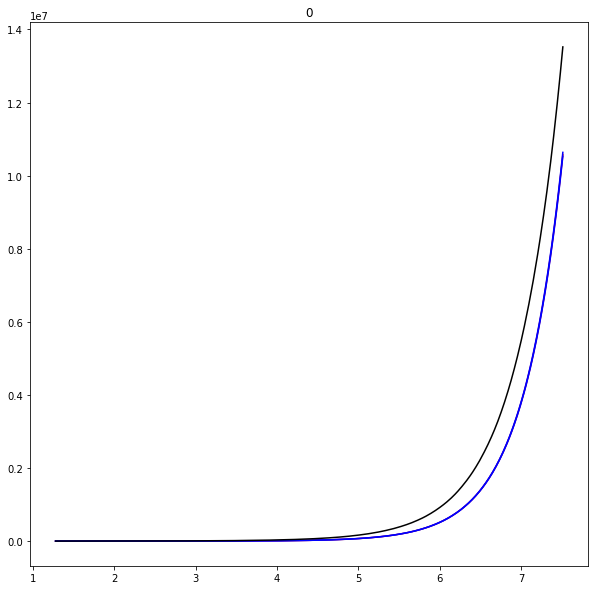

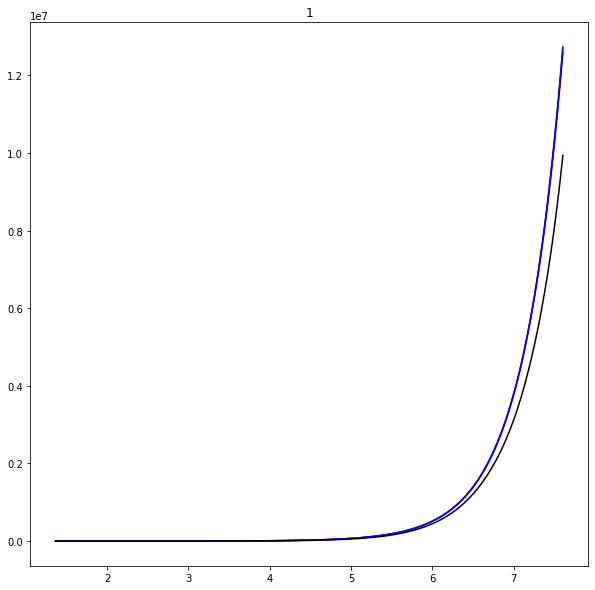

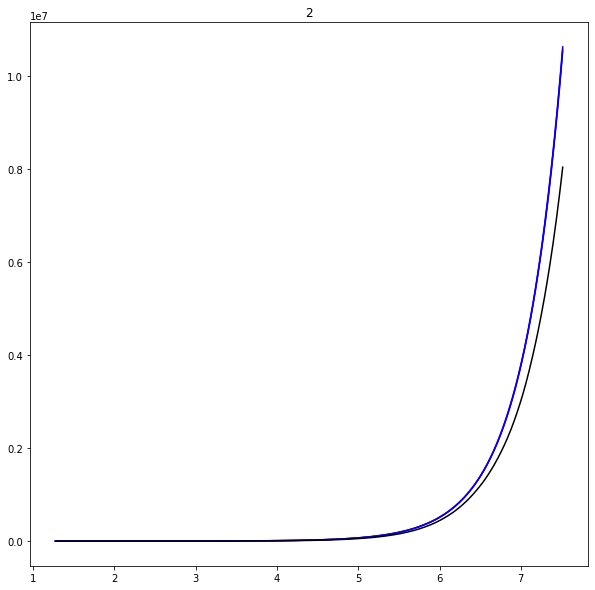

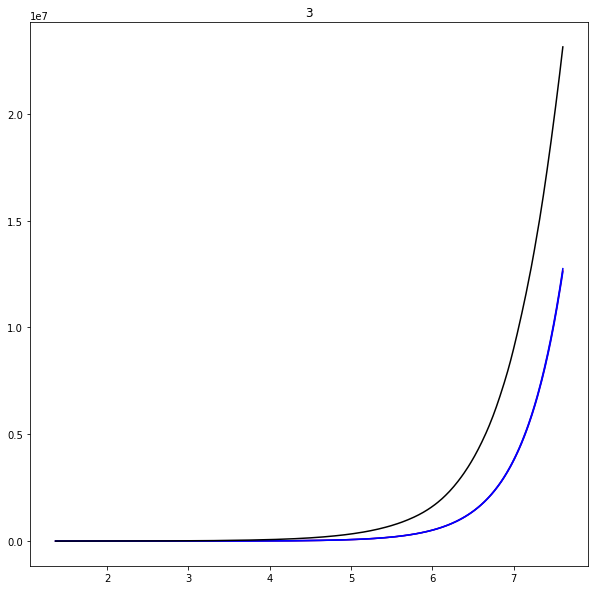

In [61]:
for ind, df in enumerate(res_dfs):
    plt.figure(figsize=(10, 10))
    plt.plot(np.log(df.r), df.theo, 'r', np.log(df.r), df.lo, 'b-', np.log(df.r), df.hi, 'b-', np.log(df.r), df.obs, 'k')
    plt.title(ind)
    plt.gcf().savefig(f"K_L{ind}.png", dpi=300)

In [62]:
res_dfs[1].to_csv('result.csv')


Compute envelops for K-estimations

In [73]:
sp_ex.envelope(pp2, sp_ex.Kest)

Generating 99 simulations of CSR  ...
1, 2,  [etd 10:50] 3,  [etd 10:53] 4,
 [etd 10:36] 5,  [etd 10:59] 6,  [etd 11:08] 7,  [etd 11:14] 8,
 [etd 11:14] 9,  [etd 11:04] 10,  [etd 10:57] 11,  [etd 11:00] 12,
 [etd 10:56] 13,  [etd 11:00] 14,  [etd 10:53] 15,  [etd 10:48] 16,
 [etd 10:40] 17,  [etd 10:35] 18,  [etd 10:28] 19,  [etd 10:21] 20,
 [etd 10:11] 21,  [etd 10:06] 22,  [etd 10:00] 23,  [etd 9:53] 24,
 [etd 9:47] 25,  [etd 9:40] 26,  [etd 9:36] 27,  [etd 9:29] 28,
 [etd 9:23] 29,  [etd 9:16] 30,  [etd 9:09] 31,  [etd 9:02] 32,
 [etd 8:56] 33,  [etd 8:47] 34,  [etd 8:39] 35,  [etd 8:28] 36,
 [etd 8:23] 37,  [etd 8:14] 38,  [etd 8:06] 39,  [etd 7:59] 40,
 [etd 7:52] 41,  [etd 7:43] 42,  [etd 7:37] 43,  [etd 7:29] 44,
 [etd 7:21] 45,  [etd 7:14] 46,  [etd 7:07] 47,  [etd 7:00] 48,
 [etd 6:51] 49,  [etd 6:43] 50,  [etd 6:35] 51,  [etd 6:26] 52,
 [etd 6:18] 53,  [etd 6:10] 54,  [etd 6:03] 55,  [etd 5:55] 56,
 [etd 5:47] 57,  [etd 5:39] 58,  [etd 5:31] 59,  [etd 5:23] 60,
 [etd 5:14] 61

r,obs,theo,lo,hi
...,...,...,...,...


In [76]:
tt=pd.DataFrame({'theo':np.array(df.rx2['theo']),'obs':np.array(df.rx2['obs']), 'r':np.array(df.rx2['r']), 'lo':np.array(df.rx2['lo']), 'hi':np.array(df.rx2['hi']) })

In [77]:
df = tt

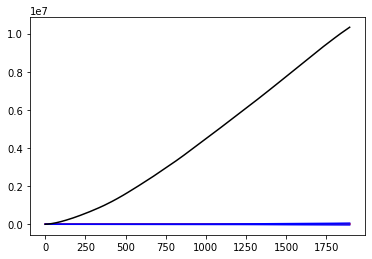

In [78]:
plt.plot(df.r, df.theo-df.theo, 'r', df.r, df.lo-df.theo, 'b-', df.r, df.hi-df.theo, 'b-', df.r,df.obs-df.theo, 'k')

In [79]:
df.to_csv('kest_wfall.csv')